# CASE STUDY #02

In [76]:
# importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# reading csv file
student_scores = pd.read_csv('Dataset/StudentsPerformance.csv')
student_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


### 1. Number of Males and Females Participated in the Test

In [7]:
student_scores['gender'].unique()

array(['female', 'male'], dtype=object)

Finding the number of males who participated in the test:

In [13]:
len(student_scores[student_scores['gender'] == 'male'])

482

**_482 male students_** participated in the test

Finding the number of female who participated in the test:

In [15]:
len(student_scores[student_scores['gender'] == 'female'])

518

**_518 female students_** participated in the test

### 2. Students' Parental Level of Education

In [16]:
student_scores['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [18]:
student_scores['Total Score'] = student_scores['math score'] + student_scores['reading score'] + student_scores['writing score']
student_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group C,some high school,free/reduced,none,0,17,10,27
1,female,group B,high school,free/reduced,none,8,24,23,55
2,female,group B,some high school,free/reduced,none,18,32,28,78
3,female,group B,some college,standard,none,11,38,32,81
4,female,group C,some college,free/reduced,none,22,39,33,94
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,267
996,male,group A,some college,standard,completed,100,96,86,282
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293


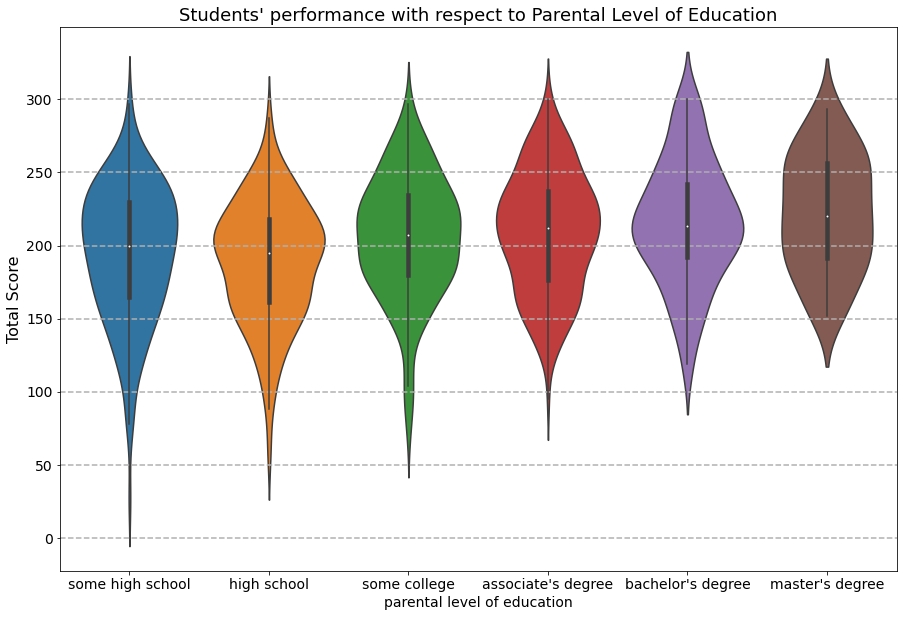

In [36]:
plt.figure(figsize=(15, 10))
plt.grid(linestyle='--', lw=1.5)
plt.ylabel('Total Score', fontsize=16)
plt.xlabel('Parental Level', fontsize=14)
plt.yticks(fontsize=14)
plt.title("Students' performance with respect to Parental Level of Education", fontsize=18)
fig = sns.violinplot(x='parental level of education', y='Total Score', data=student_scores)
fig.set_xticklabels(list(student_scores['parental level of education'].unique()), fontsize=14)
plt.show()

It is evident from the above plot that the students whose parental level of education is higher performed well(overall) in the tests.

### 3. Average Scores

In [39]:
math_score = student_scores[['gender', 'math score', 'test preparation course']]
math_score.groupby('gender').mean()

,math score
gender,
female,63.376448
male,68.821577


On average Male students performed well in Maths

In [43]:
reading_score = student_scores[['gender', 'reading score', 'test preparation course']]
reading_score.groupby('gender').mean()

,reading score
gender,
female,72.590734
male,65.545643


On average Female students performed well in Reading

In [44]:
writing_score = student_scores[['gender', 'writing score', 'test preparation course']]
writing_score.groupby('gender').mean()

,writing score
gender,
female,72.467181
male,63.446058


On average Female students performed well in Writing


In [45]:
math_score.groupby('test preparation course').mean()

,math score
test preparation course,
completed,69.96648
none,63.78972


On average students who completed the course outperformed those who didn't

In [46]:
reading_score.groupby('test preparation course').mean()

,reading score
test preparation course,
completed,74.175978
none,66.417445


On average students who completed the course outperformed those who didn't

In [47]:
writing_score.groupby('test preparation course').mean()

,writing score
test preparation course,
completed,74.684358
none,64.457944


On average students who completed the course outperformed those who didn't

It is evident from the above data that, the students who completed the course have an upper hand in all the test scores.

### 4. Scoring Variation

##### 4.1 Based on Gender

In [49]:
math_score.groupby('gender').var()

,math score
gender,
female,256.958593
male,211.889097


In [52]:
reading_score.groupby('gender').var()

,reading score
gender,
female,207.677438
male,200.211010


In [53]:
writing_score.groupby('gender').var()

,writing score
gender,
female,220.369327
male,202.413924


For both genders there's a variance above 200 for each test scores.

#####  4.2 Based on Test preparation course

In [54]:
math_score.groupby('test preparation course').var()

,math score
test preparation course,
completed,210.884027
none,246.668662


In [55]:
reading_score.groupby('test preparation course').var()

,reading score
test preparation course,
completed,183.265864
none,213.419851


In [56]:
writing_score.groupby('test preparation course').var()

,writing score
test preparation course,
completed,175.202612
none,226.251739


For reading and writing the variance is lower for students who completed the course than who didin't

### 5. Bonus Score

Finding the students eligible for bonus

In [73]:
avg_math_score = student_scores['math score'].mean()
no_of_students = len(student_scores)
top_scorers = student_scores[student_scores['math score'] > avg_math_score].sort_values('math score', ascending=False)
top_scorers.head(int(0.25 * no_of_students))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
999,male,group E,bachelor's degree,standard,completed,100,100,100,300
517,female,group E,associate's degree,standard,none,100,100,100,300
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293
997,male,group D,some college,standard,completed,100,97,99,296
996,male,group A,some college,standard,completed,100,96,86,282
...,...,...,...,...,...,...,...,...,...
418,female,group B,high school,standard,completed,77,82,89,248
419,female,group C,bachelor's degree,standard,none,77,88,87,252
420,female,group C,bachelor's degree,standard,completed,77,94,95,266
421,female,group C,some college,free/reduced,none,77,90,91,258


The management can provide scholarship to the above 250 students who performed above average in the math tests.